# Feature Engineering


## Items for Feature engineering

1. How many loans has this customer had?
2. Did they miss payments last time?
3. How many small payments did they make last time?
4. Time gap between clearing the last loan and taking this one.
5. LoanToLimitRatio: AmountDisbursed / LoanLimit
6. InterestPerDay: Interest / LoanDuration
7. DaysToFirstPayment: Days between BorrowDate and loan_repayment_first_payment
8. BusinessAge: BorrowDate (Year) - YearEstablished

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', None)
# DATA_DIR = Path("data")  # adjust if needed
# pd.set_option("display.max_columns", 100)


In [25]:
# Load the main dataset 
df = pd.read_csv('data/cleaned_dataset.csv')

# Display the first few rows of the dataset 
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,...,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,...,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,...,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,...,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,...,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,...,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018


In [26]:
# Sort for History Calculation
df = df.sort_values(by=['CustomerId', 'BorrowDate'])

In [27]:
# Convert date columns to datetime format for easier analysis

# BorrowDate is mostly MM/DD/YYYY
df["BorrowDate"] = pd.to_datetime(df["BorrowDate"], errors="coerce", dayfirst=False)

# These are mostly DD/MM/YYYY
df["loan_repayment_first_payment"] = pd.to_datetime(df["loan_repayment_first_payment"], errors="coerce", dayfirst=True)
df["loan_repayment_last_payment"] = pd.to_datetime(df["loan_repayment_last_payment"], errors="coerce", dayfirst=True)

# These are mostly in YYYY-MM-DD format
df["ClearDate"] = pd.to_datetime(df["ClearDate"], errors="coerce", format="%Y-%m-%d")
df.head()

/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_59148/4099672203.py:7: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["loan_repayment_first_payment"] = pd.to_datetime(df["loan_repayment_first_payment"], errors="coerce", dayfirst=True)
/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_59148/4099672203.py:8: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["loan_repayment_last_payment"] = pd.to_datetime(df["loan_repayment_last_payment"], errors="coerce", dayfirst=True)


,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,...,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
2576,646265,10000,2750,0.0,2024-02-13,5 weeks credit ease,molo,2024-12-02,23,male,...,1800,13,12750,2025-04-30,2025-08-20,0,5.0,natural resources/environmental,firewood & charcoal vendor,2022
124,720868,10000,3850,0.0,2024-05-09,7 weeks credit ease,molo,2024-05-09,23,male,...,2000,1,264,2025-08-20,2025-08-20,0,7.0,food & hospitality,green grocery (fruit/vegetables),2012
521,650669,6000,1750,0.0,2024-02-19,5 weeks credit ease,molo,2024-02-22,90,male,...,2000,4,7750,2025-08-25,2025-09-09,0,5.0,food & hospitality,green grocery (fruit/vegetables),2019
345,662037,5000,1500,0.0,2024-03-29,5 weeks credit ease,molo,2024-03-25,90,male,...,3500,3,6500,2025-09-09,2025-09-20,0,5.0,food & hospitality,green grocery (fruit/vegetables),2021
2005,705587,5000,1500,0.0,2024-07-16,5 weeks credit ease,molo,2024-07-16,90,male,...,2000,9,6500,2025-09-20,2025-10-09,0,5.0,fashion & beauty products,second hand clothes,2019


In [28]:
# Business Age at the time of the loan
df['BusinessAge'] = df['BorrowDate'].dt.year - df['YearEstablished']

In [29]:
# Days taken to make the very first payment 
df['DaysToFirstPayment'] = (df['loan_repayment_first_payment'] - df['BorrowDate']).dt.days

# Seasonality: Month of borrowing (Is December riskier?)
df['BorrowMonth'] = df['BorrowDate'].dt.month

In [30]:
# Utilization: How much of their limit are they using?
df['LoanToLimitRatio'] = df['AmountDisbursed'] / df['LoanLimit']

# Cost of Capital: Interest as % of Principal
df['InterestRate'] = df['Interest'] / df['AmountDisbursed']

In [31]:
# Sequence: 1st loan, 2nd loan, etc.
df['Loan_Sequence'] = df.groupby('CustomerId').cumcount() + 1

# Previous Missed Payments
df['Prev_MissedInstalments'] = df.groupby('CustomerId')['MissedInstalments'].shift(1)

# Previous Transaction Count (Did they pay in lump sums or bits?)
df['Prev_TxnCount'] = df.groupby('CustomerId')['loan_repayment_txn_count'].shift(1)

# Previous Loan Size
df['Prev_Amount'] = df.groupby('CustomerId')['AmountDisbursed'].shift(1)

# Gap between loans (Days since last ClearDate)
df['Prev_ClearDate'] = df.groupby('CustomerId')['ClearDate'].shift(1)
df['DaysSinceLastLoan'] = (df['BorrowDate'] - df['Prev_ClearDate']).dt.days

In [32]:
# "Experienced delinquent customers" Indicator: High Experience and History of Missed Payments
# (Sequence > 5) AND (Prev_Missed > 0)
df['experienced_delinquent'] = ((df['Loan_Sequence'] > 5) & (df['Prev_MissedInstalments'] > 0)).astype(int)

# Fill NaNs for the first loan (since they have no history)
# We fill with 0 or -1 to indicate "No History"
history_cols = ['Prev_MissedInstalments', 'Prev_TxnCount', 'Prev_Amount', 'DaysSinceLastLoan']
df[history_cols] = df[history_cols].fillna(0)

print("Feature Engineering Complete.")
print(df[['CustomerId', 'Loan_Sequence', 'Prev_MissedInstalments', 'LoanToLimitRatio', 'experienced_delinquent']].head(10))

Feature Engineering Complete.
      CustomerId  Loan_Sequence  Prev_MissedInstalments  LoanToLimitRatio  \
2576          23              1                     0.0          0.571429   
124           23              2                     5.0          1.000000   
521           90              1                     0.0          0.400000   
345           90              2                     5.0          0.625000   
2005          90              3                     5.0          0.632911   
2192          90              4                     5.0          0.877193   
231           90              5                     5.0          0.500000   
344          156              1                     0.0          0.500000   
2975         180              1                     0.0          0.821918   
2191         180              2                     5.0          0.806452   

      experienced_delinquent  
2576                       0  
124                        0  
521                        0 

In [33]:
# Target
observation_date = df['BorrowDate'].max()
df['IsDefault'] = ((df['LoanBalance'] > 0) & (df['ClearDate'] < observation_date)).astype(int)

In [34]:
# Filter for Valid History
# We only check correlations for Cycle 2+ (where history actually exists)
# This prevents the "0-filled" first loans from diluting the signal
history_df = df[df['Loan_Sequence'] > 1].copy()

In [35]:
# Correlation Matrix
features = [
    'IsDefault', 
    'LoanToLimitRatio',       
    'Prev_MissedInstalments', 
    'Prev_TxnCount',          
    'Loan_Sequence',          
    'DaysToFirstPayment',     
    'experienced_delinquent',         
    'LoanLimit'               
]

corr_matrix = history_df[features].corr()

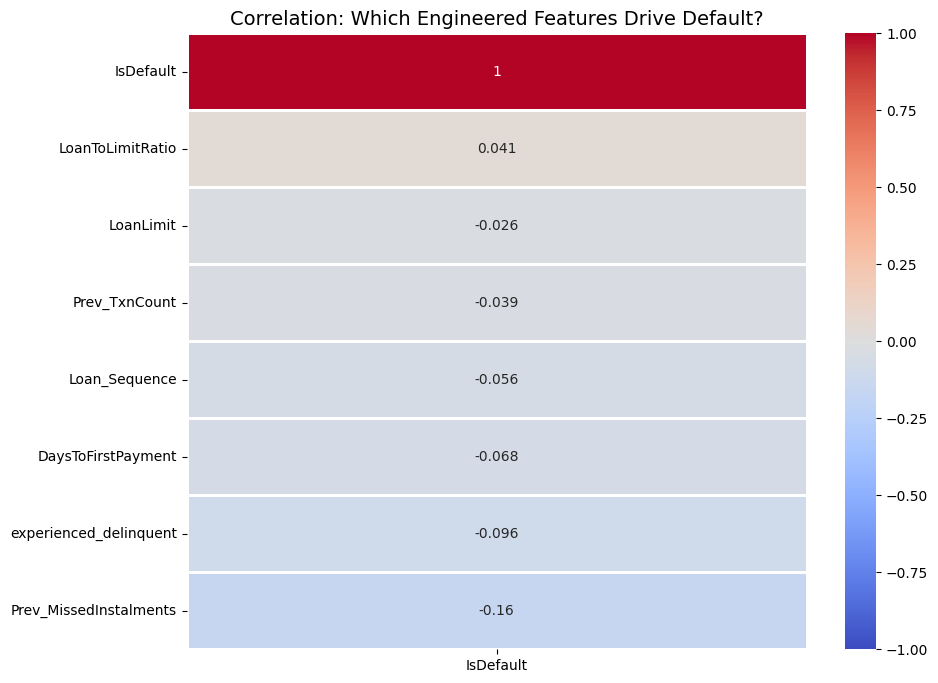

--- Correlation Values with IsDefault ---
IsDefault                 1.000000
LoanToLimitRatio          0.041145
LoanLimit                -0.025648
Prev_TxnCount            -0.038680
Loan_Sequence            -0.056022
DaysToFirstPayment       -0.068166
experienced_delinquent   -0.095555
Prev_MissedInstalments   -0.161884
Name: IsDefault, dtype: float64


In [36]:
# Visualization of Correlation Matrix on Engineered Features
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['IsDefault']].sort_values(by='IsDefault', ascending=False), 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, vmax=1,
            linewidths=1,
            linecolor='white')

plt.title('Correlation: Which Engineered Features Drive Default?', fontsize=14)
plt.show()

print("--- Correlation Values with IsDefault ---")
print(corr_matrix['IsDefault'].sort_values(ascending=False))

In [38]:
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,...,LoanToLimitRatio,InterestRate,Loan_Sequence,Prev_MissedInstalments,Prev_TxnCount,Prev_Amount,Prev_ClearDate,DaysSinceLastLoan,experienced_delinquent,IsDefault
2576,646265,10000,2750,0.0,2024-02-13,5 weeks credit ease,molo,2024-12-02,23,male,...,0.571429,0.275000,1,0.0,0.0,0.0,NaT,0.0,0,0
124,720868,10000,3850,0.0,2024-05-09,7 weeks credit ease,molo,2024-05-09,23,male,...,1.000000,0.385000,2,5.0,13.0,10000.0,2024-12-02,-207.0,0,0
521,650669,6000,1750,0.0,2024-02-19,5 weeks credit ease,molo,2024-02-22,90,male,...,0.400000,0.291667,1,0.0,0.0,0.0,NaT,0.0,0,0
345,662037,5000,1500,0.0,2024-03-29,5 weeks credit ease,molo,2024-03-25,90,male,...,0.625000,0.300000,2,5.0,4.0,6000.0,2024-02-22,36.0,0,0
2005,705587,5000,1500,0.0,2024-07-16,5 weeks credit ease,molo,2024-07-16,90,male,...,0.632911,0.300000,3,5.0,3.0,5000.0,2024-03-25,113.0,0,0


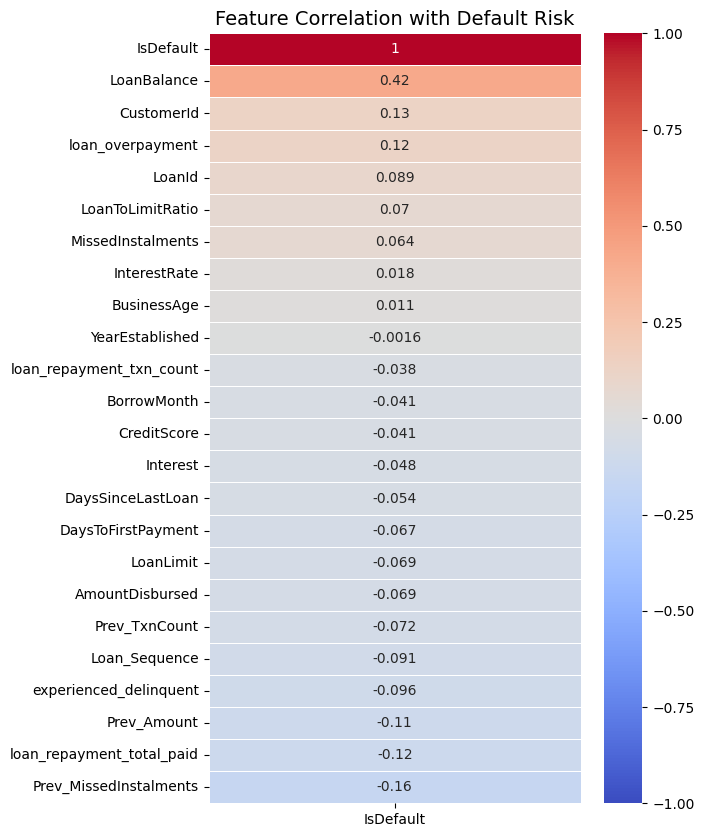

In [41]:
# Select only Numerical Columns (Correlation requires numbers)
# Assume 'df' is the fully engineered dataframe
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the Correlation Matrix
corr_matrix = numeric_df.corr()

# Filter for the Target Variable ('IsDefault') and Sort
target_corr = corr_matrix[['IsDefault']].sort_values(by='IsDefault', ascending=False)

# Plot the Heatmap
plt.figure(figsize=(6, 10)) # Tall and narrow figure
sns.heatmap(target_corr, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            linewidths=0.5,
            linecolor='white')

plt.title('Feature Correlation with Default Risk', fontsize=14)
plt.show()